In [22]:
# 1.) Importing all the neccessary files.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# 2.) Loading the data.
df = pd.read_csv('/content/student_feedback.csv')
print(df.head())

   Unnamed: 0  Student ID  Well versed with the subject  \
0           0         340                             5   
1           1         253                             6   
2           2         680                             7   
3           3         806                             9   
4           4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7                     6   
3                                           6                     7   
4                                          10                     8   

   Degree of difficulty of assignments  Solves doubts willingly  \
0                                    6                        9   
1                                    6                        2   
2                

In [24]:
# 3.) Removing the 'Unnamed: 0' and 'Student ID' columns as they aren't needed for analysis
df_clean = df.drop(columns=['Unnamed: 0', 'Student ID'])

def categorize_sentiment(score):
    if score >= 8: return 'Positive'
    elif score >= 5: return 'Neutral'
    else: return 'Negative'

df_clean['Sentiment'] = df_clean['Course recommendation based on relevance'].apply(categorize_sentiment)

In [25]:
# 4.) Creating a figure with multiple subplots.
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Overall Student Sentiment')

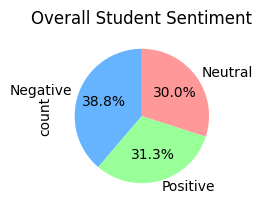

In [26]:
# 5.) Visual 1: Sentiment Distribution (Pie Chart).
plt.subplot(2, 2, 1)
df_clean['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999'], startangle=90)
plt.title('Overall Student Sentiment')

/tmp/ipython-input-4153898558.py:14: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


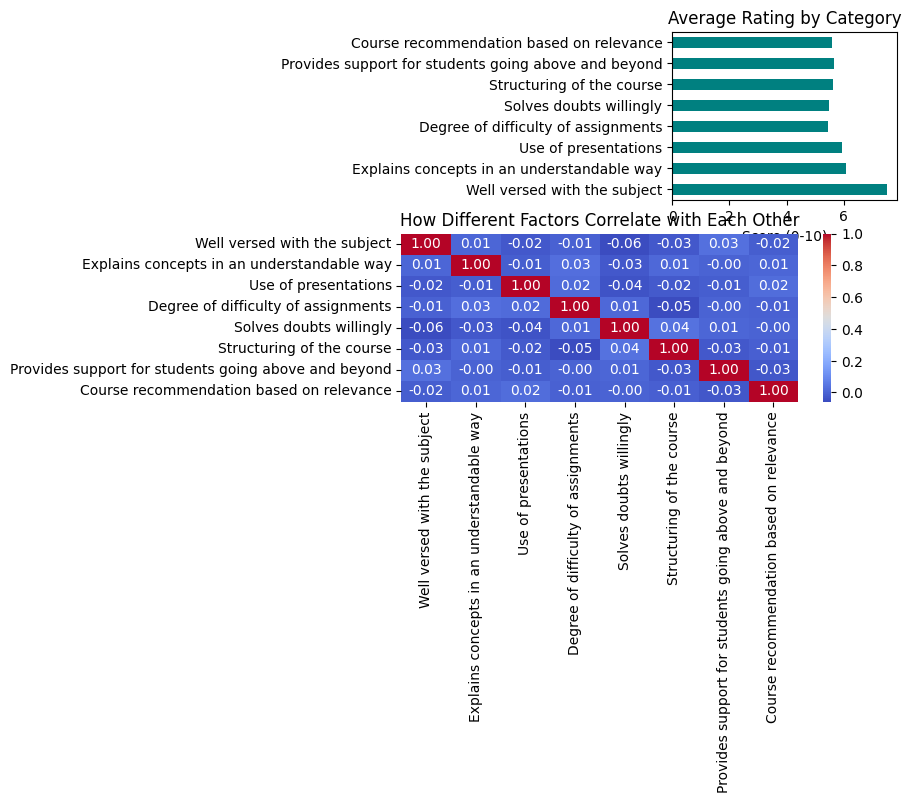

In [27]:
# 6.) Visual 2: Average Score per Category.
plt.subplot(2, 2, 2)

ratings_only = df_clean.drop(columns=['Sentiment'])
ratings_only.mean().plot(kind='barh', color='teal')
plt.title('Average Rating by Category')
plt.xlabel('Score (0-10)')

# 7.) Visual 3: Correlation Heatmap
plt.subplot(2, 1, 2)
sns.heatmap(ratings_only.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('How Different Factors Correlate with Each Other')

plt.tight_layout()
plt.show()